In [ ]:
import json
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from google.colab import drive
import random
import shutil
import json

In [ ]:
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Dataset


In [ ]:
dataset_path = '/content/drive/MyDrive/Dataset'
images_dir = os.path.join(dataset_path, 'Pedestrian_dataset_for_internship_assignment')
annotations_file = os.path.join(dataset_path, 'random_sample_mavi_2_gt.json')

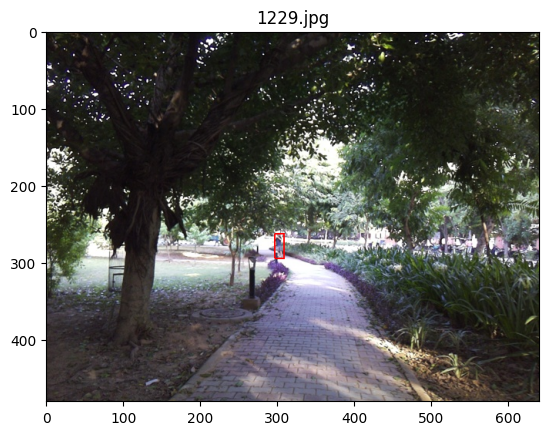

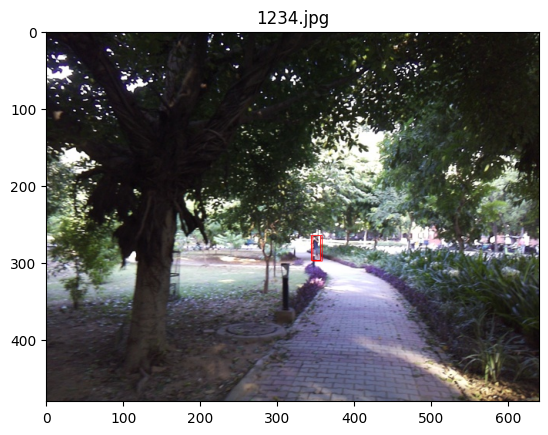

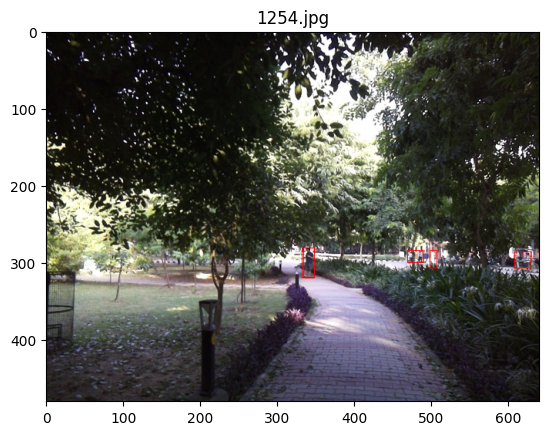

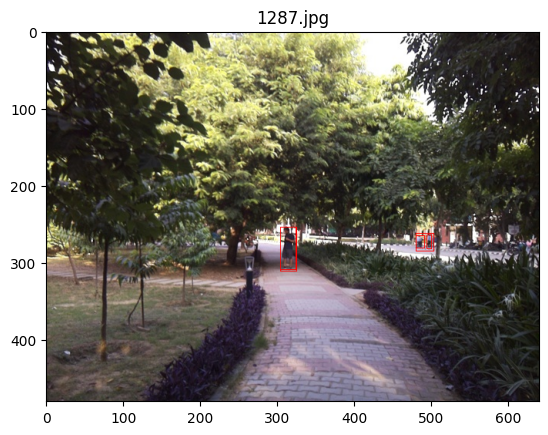

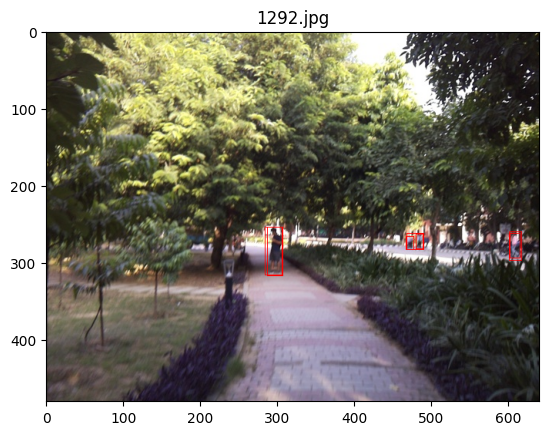

In [ ]:
# @title Visualising the Dataset
with open(annotations_file, 'r') as f:
    data = json.load(f)

images = data['images']
annotations = data['annotations']

# Set a counter to limit the number of images
image_counter = 0
max_images = 5

for image_info in images:
    if image_counter >= max_images:
        break

    image_path = os.path.join(images_dir, image_info['file_name'])

    if os.path.exists(image_path):
        image = Image.open(image_path)

        image_id = image_info['id']
        image_annotations = [ann for ann in annotations if ann['image_id'] == image_id]

        draw = ImageDraw.Draw(image)
        for annotation in image_annotations:
            bbox = annotation['bbox']
            draw.rectangle([(bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3])], outline='red', width=1)

        plt.imshow(image)
        plt.title(image_info['file_name'])
        plt.show()  # Ensure that each image is displayed

        # Increment the counter
        image_counter += 1


In [ ]:
# @title Splitting the Dataset into Training and Validation after randomisation
# Define paths
source_folder = '/content/drive/MyDrive/Dataset/Pedestrian_dataset_for_internship_assignment/'
destination_folder = '/content/drive/MyDrive/Dataset/Main/'

# Assuming 'images' is a list of image metadata and 'annotations' contains the respective annotations
images_dir = '/content/drive/MyDrive/Dataset/Pedestrian_dataset_for_internship_assignment/'  # Define image folder
train_images_dir = '/content/drive/MyDrive/Dataset/Main/train2017'
val_images_dir = '/content/drive/MyDrive/Dataset/Main/val2017'

train_image = []
val_image = []
train_annotations = []
val_annotations = []

# Shuffle images and split them
random.shuffle(images)
count = 0

# Go through all images
for image_info in images:
    image_path = os.path.join(images_dir, image_info['file_name'])


    if os.path.exists(image_path):
        image = Image.open(image_path)

        # Split images into train/validation based on count
        if count <= 160:
            # Copy to train folder
            if not os.path.exists(train_images_dir):
                os.makedirs(train_images_dir)
            source_path = os.path.join(source_folder, image_info['file_name'])
            destination_path = os.path.join(train_images_dir, image_info['file_name'])

            if os.path.exists(source_path):
                shutil.copy(source_path, train_images_dir)
                print(f'Copied {image_info["file_name"]} to train folder')
                train_image.append(image_info)  # Add to train set
            else:
                print(f'{image_info["file_name"]} does not exist in the source folder.')

            # Also copy relevant annotation to train annotations
            for annotation in annotations:
                if annotation['image_id'] == image_info['id']:
                    train_annotations.append(annotation)

        else:
            # Copy to validation folder
            if not os.path.exists(val_images_dir):
                os.makedirs(val_images_dir)
            source_path = os.path.join(source_folder, image_info['file_name'])
            destination_path = os.path.join(val_images_dir, image_info['file_name'])

            if os.path.exists(source_path):
                shutil.copy(source_path, val_images_dir)
                print(f'Copied {image_info["file_name"]} to validation folder')
                val_image.append(image_info)  # Add to validation set
            else:
                print(f'{image_info["file_name"]} does not exist in the source folder.')

            # Also copy relevant annotation to validation annotations
            for annotation in annotations:
                if annotation['image_id'] == image_info['id']:
                    val_annotations.append(annotation)

        count += 1

# Create new JSON for training and validation annotations
train_data = {
    'images': train_image,
    'annotations': train_annotations
}

val_data = {
    'images': val_image,
    'annotations': val_annotations
}

# Save the new JSON files
train_json_path = os.path.join(destination_folder + "annotations", 'instances_train2017.json')
val_json_path = os.path.join(destination_folder + "annotations", 'instances_val2017.json')

# Save training annotations
if not os.path.exists(destination_folder + "annotations"):
    os.makedirs(destination_folder + "annotations")
with open(train_json_path, 'w') as f:
    json.dump(train_data, f, indent=4)

# Save validation annotations
if not os.path.exists(destination_folder + "annotations"):
    os.makedirs(destination_folder + "annotations")
with open(val_json_path, 'w') as f:
    json.dump(val_data, f, indent=4)

print(f"Annotations and images have been saved. Annotations saved to {train_json_path} and {val_json_path}")


Copied 11588.jpg to train folder
Copied 5866.jpg to train folder
Copied 5918.jpg to train folder
Copied 15348.jpg to train folder
Copied 12964.jpg to train folder
Copied 11002.jpg to train folder
Copied 13984.jpg to train folder
Copied 8563.jpg to train folder
Copied 3571.jpg to train folder
Copied 8531.jpg to train folder
Copied 10990.jpg to train folder
Copied 11004.jpg to train folder
Copied 15283.jpg to train folder
Copied 6215.jpg to train folder
Copied 12040.jpg to train folder
Copied 12046.jpg to train folder
Copied 5931.jpg to train folder
Copied 13511.jpg to train folder
Copied 8556.jpg to train folder
Copied 7466.jpg to train folder
Copied 3237.jpg to train folder
Copied 15306.jpg to train folder
Copied 8836.jpg to train folder
Copied 13995.jpg to train folder
Copied 11281.jpg to train folder
Copied 8416.jpg to train folder
Copied 9178.jpg to train folder
Copied 11303.jpg to train folder
Copied 15330.jpg to train folder
Copied 12970.jpg to train folder
Copied 16213.jpg to tra

In [ ]:
!pip install --upgrade pycocotools


In [ ]:
# @title DINO cloning
%%bash
git clone https://github.com/IDEA-Research/DINO.git
cd DINO

Cloning into 'DINO'...


In [ ]:
!pip install torch torchvision
import torch
print(torch.__version__)

2.5.1+cu121


In [ ]:
%cd DINO
!pip install -r requirements.txt

/content/drive/MyDrive/Dataset/DINO
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-install-i582fx3l/pycocotools_e48d61b9f3df4ac7bc7c26a7ae296a8a
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-install-i582fx3l/pycocotools_e48d61b9f3df4ac7bc7c26a7ae296a8a
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-install-i582fx3l/panopticapi_8f87c72449f9480f80f7c6445e554695
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/panopticapi.git /tmp/pip-install-i582fx3l/panopticapi_8f87c72449f9480f80f7c6445e554695
  Resolved https://github.com/cocodataset/panopticapi.git to commit 7bb4655548f98f3fedc07bf37e9040a992b054b0
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp31

In [ ]:
%cd models/dino/ops

!pip install .

!python test.py

%cd ../../..


/content/drive/MyDrive/Dataset/DINO/models/dino/ops
Processing /content/drive/MyDrive/Dataset/DINO/models/dino/ops
  Preparing metadata (setup.py) ... done
  Created wheel for MultiScaleDeformableAttention: filename=MultiScaleDeformableAttention-1.0-cp310-cp310-linux_x86_64.whl size=2957076 sha256=4aabdab0a0e3b8313763ae966cbe997b6498a45e3a224c76113c6fc4ef718a01
  Stored in directory: /tmp/pip-ephem-wheel-cache-ijp5ec35/wheels/37/9b/2c/3fb75f29bdb7f51ff3fcb55f5421f64a86b38fc4ca2d4cb29a
Successfully built MultiScaleDeformableAttention
  Attempting uninstall: MultiScaleDeformableAttention
    Found existing installation: MultiScaleDeformableAttention 1.0
    Uninstalling MultiScaleDeformableAttention-1.0:
      Successfully uninstalled MultiScaleDeformableAttention-1.0
* True check_forward_equal_with_pytorch_double: max_abs_err 8.67e-19 max_rel_err 2.35e-16
* True check_forward_equal_with_pytorch_float: max_abs_err 4.66e-10 max_rel_err 1.13e-07
* True check_gradient_numerical(D=30)
* True

In [ ]:
!pip install yapf==0.40.1

In [ ]:
# @title Evalution
!bash scripts/DINO_eval.sh /content/drive/MyDrive/Dataset/Main /content/drive/MyDrive/Dataset/checkpoint0011_4scale.pth

Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[12/30 09:47:46.087]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: has uncommited changes, branch: main

[12/30 09:47:46.088]: Command: main.py --output_dir logs/DINO/R50-MS4-%j -c config/DINO/DINO_4scale.py --coco_path /content/drive/MyDrive/Dataset/Main --eval --resume /content/drive/MyDrive/Dataset/checkpoint0011_4scale.pth --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[12/30 09:47:46.093]: Full config saved to logs/DINO/R50-MS4-%j/config_args_all.json
[12/30 09:47:46.093]: world size: 1
[12/30 09:47:46.093]: rank: 0
[12/30 09:47:46.094]: local_rank: 0
[12/30 09:47:46.094]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/drive/MyDri

In [ ]:
!bash scripts/DINO_train.sh /content/drive/MyDrive/Dataset/Main

Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[12/29 15:57:18.851]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: has uncommited changes, branch: main

[12/29 15:57:18.852]: Command: main.py --output_dir logs/DINO/R50-MS4 -c config/DINO/DINO_4scale.py --coco_path /content/drive/MyDrive/Dataset/Main --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[12/29 15:57:18.857]: Full config saved to logs/DINO/R50-MS4/config_args_all.json
[12/29 15:57:18.858]: world size: 1
[12/29 15:57:18.859]: rank: 0
[12/29 15:57:18.859]: local_rank: 0
[12/29 15:57:18.860]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/drive/MyDrive/Dataset/Main', coco_panoptic_path=None, remove_difficult=False, fix_size=Fal

In [ ]:
import os, sys
import torch, json
import numpy as np

from main import build_model_main
from util.slconfig import SLConfig
from datasets import build_dataset
from util.visualizer import COCOVisualizer
from util import box_ops


In [ ]:
model_config_path = "/content/drive/MyDrive/Dataset/DINO/config/DINO/DINO_4scale.py"
model_checkpoint_path = "logs/DINO/R50-MS4/checkpoint_best_regular.pth"

In [ ]:
args = SLConfig.fromfile(model_config_path)
args.device = 'cuda'
model, criterion, postprocessors = build_model_main(args)
checkpoint = torch.load(model_checkpoint_path, map_location='cpu')
model.load_state_dict(checkpoint['model'])
_ = model.eval()

/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-11-72ca36f16c8d>:4: FutureWarning: You are using `torch.load` with `weights_only=False`

In [ ]:
with open('/content/drive/MyDrive/Dataset/Main/annotations/instances_val2017.json') as f:
    id2name = json.load(f)

    # If you are interested in a specific nested part, for example:
    if 'annotations' in id2name:
        annotations = id2name['annotations']
        id2name = {int(item['id']): item['category_id'] for item in annotations}
    else:
        print("The expected key 'annotations' was not found")


In [ ]:
args.dataset_file = 'coco'
args.coco_path = "/content/drive/MyDrive/Dataset/Main/" # the path of coco
args.fix_size = False

dataset_val = build_dataset(image_set='val', args=args)

data_aug_params: {
  "scales": [
    480,
    512,
    544,
    576,
    608,
    640,
    672,
    704,
    736,
    768,
    800
  ],
  "max_size": 1333,
  "scales2_resize": [
    400,
    500,
    600
  ],
  "scales2_crop": [
    384,
    600
  ]
}
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


Original


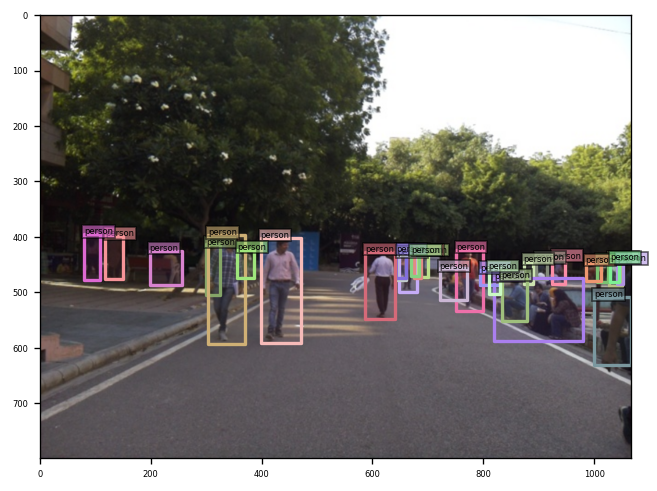

Predicted


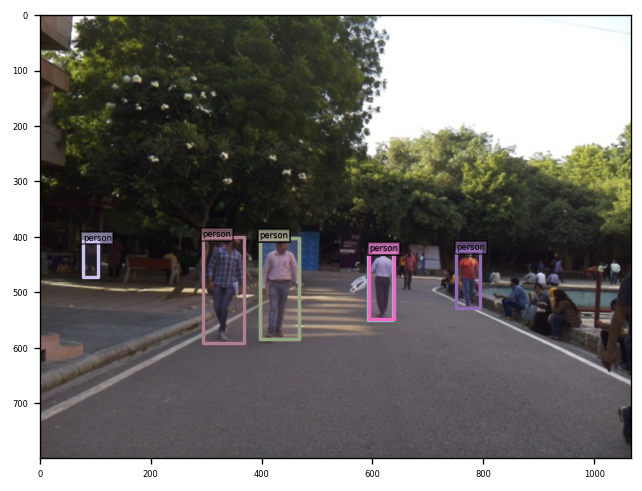



Number of Annotations: 29 
Number of Predictions: 7 


Original


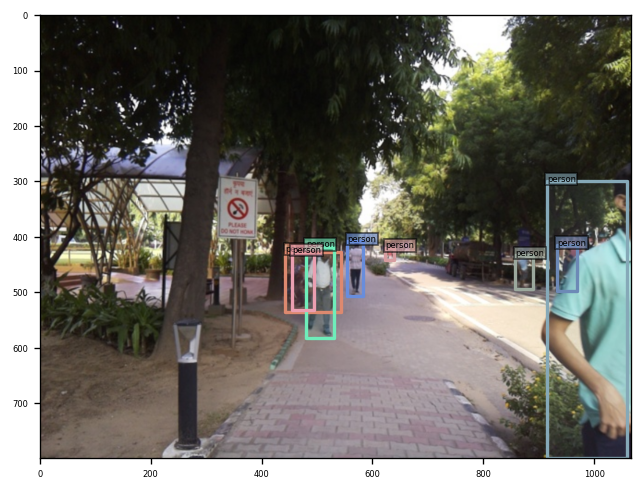

Predicted


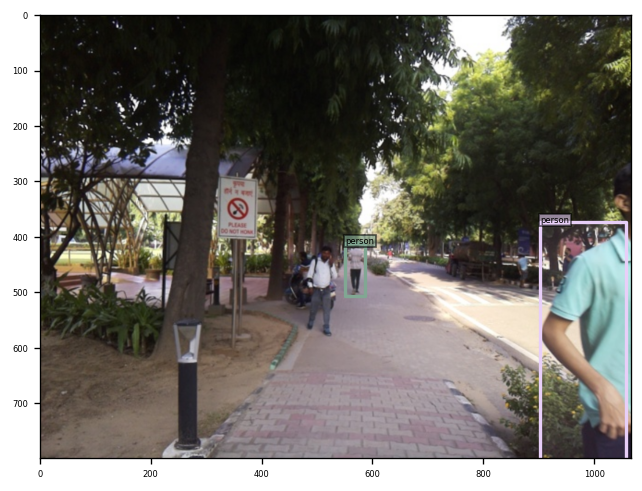



Number of Annotations: 8 
Number of Predictions: 2 


Original


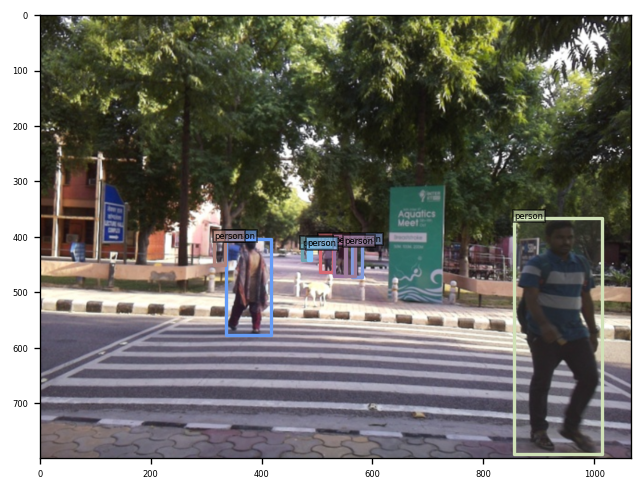

Predicted


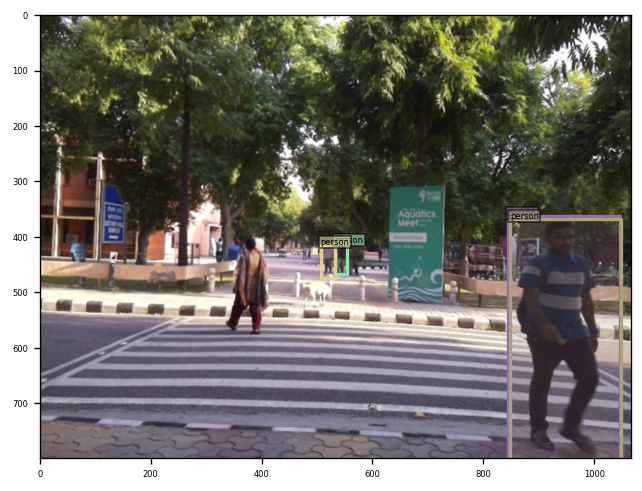



Number of Annotations: 9 
Number of Predictions: 4 


Original


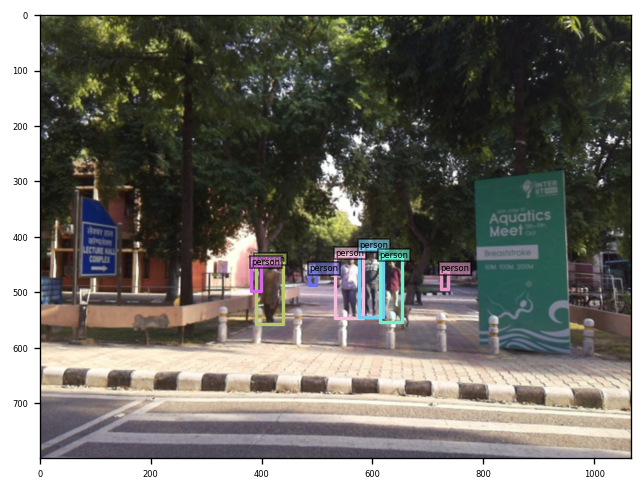

Predicted


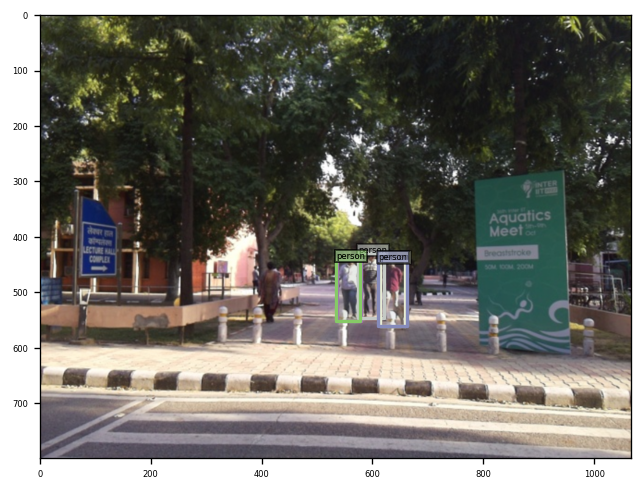



Number of Annotations: 7 
Number of Predictions: 5 


Original


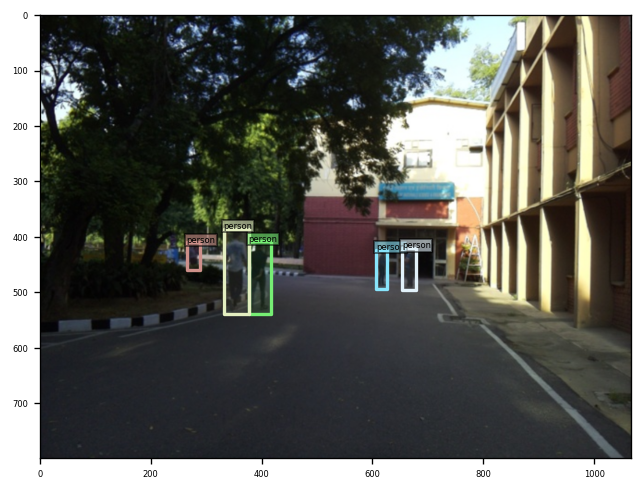

Predicted


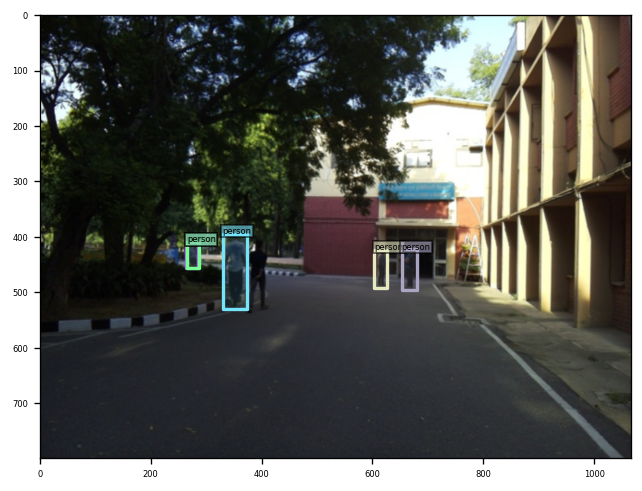



Number of Annotations: 5 
Number of Predictions: 5 




In [ ]:

# Set the threshold for filtering predictions
threshold = 0.4

model.eval()

# Mapping of labels (adjust to your specific dataset)
id2name = {
    1: 'person',
    # Add more labels as needed
}

# Function to visualize predictions and ground truth
def visualize_results_on_images_original(dataset_val, model, id2name, threshold=0.3, num_images=5):
    vslzr = COCOVisualizer()  # Initialize the COCO visualizer

    # Process the first `num_images` images
    for i in range(num_images):
        image, targets = dataset_val[i]  # Get an image and its target annotations
        box_label = [id2name.get(int(item), "Unknown") for item in targets['labels']]  # Ground truth labels

        # Check if any label is missing in id2name
        for item in targets['labels']:
            if int(item) not in id2name:
                print(f"Label {item} is missing in id2name")

        # Create ground truth dictionary
        gt_dict = {
            'boxes': targets['boxes'],
            'image_id': targets['image_id'],
            'size': targets['size'],
            'box_label': box_label,
        }
        x1 = len(box_label)
        # Visualize ground truth
        print("Original")
        vslzr.visualize(image, gt_dict, savedir=None)

        # Perform inference on the image
        image_input = image[None].cuda()  # Add batch dimension and move to GPU
        output = model(image_input)  # Get model predictions

        output = postprocessors['bbox'](output, torch.Tensor([[1.0, 1.0]]).cuda())[0]

        # Filter predictions with the threshold
        scores = output['scores']
        labels = output['labels']
        boxes = box_ops.box_xyxy_to_cxcywh(output['boxes'])  # Convert boxes to cxcywh format

        # Select boxes based on score threshold
        select_mask = scores > threshold
        box_label_pred = [id2name.get(int(item), "Unknown") for item in labels[select_mask]]

        # Create predicted dictionary
        pred_dict = {
            'boxes': boxes[select_mask],
            'size': targets['size'],
            'box_label': box_label_pred
        }
        x2 = len(box_label_pred)
        print("Predicted")
        # Visualize predictions
        vslzr.visualize(image, pred_dict, savedir=None)
        print("\n\nNumber of Annotations:", x1,"\nNumber of Predictions:", x2, "\n\n")

# Run the visualization for 5 images
visualize_results_on_images_original(dataset_val, model, id2name, threshold=threshold, num_images=5)
